## GOOGLE PLAY STORE ANALYSIS PROJECT

Understand the trend of applications available on the google play store with a focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit.
Analyze detailed information on apps in the Google Play Store to discover insights on app features and the current state of the Android app market.

### LIBRARIES 

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#display the graphs
%matplotlib inline

#display values to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x) 

### READING THE DATASET

In [2]:
#read the csv file into a dataframe
data = pd.read_csv("google_play_store.csv")

#create a copy of the data
df = data.copy()

#display first five rows of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#total number of rows and columns of the dataset
df.shape

(10841, 13)

### DESCRIPTIVE SUMMARY OF DATASET:
- There are a total of **10,841** rows and **13** columns in the dataset.
- The names of the apps are specified under the **App** column.
- The apps are grouped into different categories and displayed under the **Category** column.
- The **Ratings** and **Reviews** columns display the performance of each app as stated by the users.
- The size of each app is displayed in kilobytes in the **Size** column and the number of downloads for each app specified in the **Installs** column.
- The apps have been grouped into either Paid or Free under the **Type** column and their corresponding prices shown in the **Price** column.
- The **Content Rating** column describes the age group of the users for which the app has been developed.
- **Genres** provides information on the different groupings of the apps. However, this information is similar to the one provided in the Category column.
- **Last Updated** column shows the dates for the most recent updates installed by the creators.
- **Current Version** column shows the recent versions of the apps and the **Android Version** column shows the version of the Android OS the app is compatible with.

### DATASET INFORMATION


In [4]:
#displays the datatypes of the columns in the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- There are **seven(7)** object datatype columns and **five(5)** numeric datatype columns.
- The dataset occupies aproximately **1.1 MB** of memory.
- We can infer that some rows have missing data since some columns have count less than the total number of rows.This will be treated in the data cleaning process.
- Some columns have numeric values but are represented as object datatype. They will be converted to more appropriate datatypes for analysis.
- Columns that will not be used for this analysis will be dropped.

#### DROP REDUNDANT COLUMNS

In [5]:
#list of columns to drop from dataset
col_to_drop = ['Type','Genres','Last Updated','Current Ver','Android Ver']

#drop listed columns
df = df.drop(columns = col_to_drop)

#verify results of the drop
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating'],
      dtype='object')

- Columns dropped as seen

#### COLUMN CONVERSION

In [6]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,Everyone,NaN


In [7]:
#columns to convert to integer datatype
col_to_check = ['Reviews']

#checking for non-numeric rows
non_numeric_values = {}
for row in col_to_check:
        non_numeric_values[row] = df.loc[pd.to_numeric(df[row], errors='coerce').isnull()]
        
#display result in tabular format
non_numeric_df = pd.concat(non_numeric_values, ignore_index = True)
non_numeric_df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,Everyone,NaN


In [8]:
#drop disruptive row
df = df.drop(df[df['Reviews'] == '3.0M'].index)

#convert Reviews column to integer datatype
df['Reviews'] = df['Reviews'].astype(float)

In [9]:
#Converting string values in Size column and converting column to float type
df['Size'] = df['Size'].str.replace('+','', regex=False) #treat + character as string NOT regex pattern
df['Size'] = df['Size'].str.replace('M','').str.replace('Varies with device','0').str.replace('k','').astype(float)

In [10]:
#Converting string values in Installs column and converting column to float type
df['Installs'] = df['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(float)

In [11]:
#Converting string values in Price column and converting column to float type
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [12]:
#verify the conversion of the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
dtypes: float64(5), object(3)
memory usage: 762.2+ KB


- Column conversions and row dropping successful

### STATISTICAL SUMMARY

In [13]:
#display statistical summary for the columns in the dataset
df.describe(include = 'all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10840,9659,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10840,33,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9366.00,NaN,NaN,NaN,4.19,0.52,1.00,4.00,4.30,4.50,5.00
Reviews,10840.00,NaN,NaN,NaN,444152.90,2927760.60,0.00,38.00,2094.00,54775.50,78158306.00
Size,10840.00,NaN,NaN,NaN,31.24,91.81,0.00,3.10,10.00,28.00,1020.00
Installs,10840.00,NaN,NaN,NaN,15464338.88,85029361.40,0.00,1000.00,100000.00,5000000.00,1000000000.00
Price,10840.00,NaN,NaN,NaN,1.03,15.95,0.00,0.00,0.00,0.00,400.00
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are **9366** unique apps in the dataset.
- There are **33** unique categories and **'Family'** has the most count.
- The average rating is **4.19**;the median rating is **4.36**.
- There is notable standard deviation in the reviews received.
- The average size of apps on the platform is **31.24 KB**, which is significantly larger than the median size.
- The maximum number of installs for an app is **one billion** which could be an outlier.
- The average price of an app is approximately **one dollar**.
- The content rating is represented in **six** unique categories with **'Everyone'** being the most frequent.
- Some columns display NaN because they either have no unique result or are non-numeric variables.

### MISSING VALUE TREATMENT

In [14]:
#check for missing values
df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
dtype: int64

- **1474** rows missing in the Rating column.

#### COLUMN IMPUTATION

In [15]:
#Since the column mean is close to the column median, the missing values can be imputed with the column mean. 
df['Rating'] = df['Rating'].fillna(value = df['Rating'].mean())

In [16]:
#verify results of the imputation
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
dtype: int64

In [17]:
#verify the new statistical summary for the Rating column
df[['Rating']].describe(include = 'all').T 

,count,mean,std,min,25%,50%,75%,max
Rating,10840.00,4.19,0.48,1.00,4.10,4.20,4.50,5.00


- Imputation was successful.
- Insignificant imapact- Median reduced by 0.1 and Std increased by 0.04.

### DATA ANALYSIS AND VISUALIZATION

### RATING

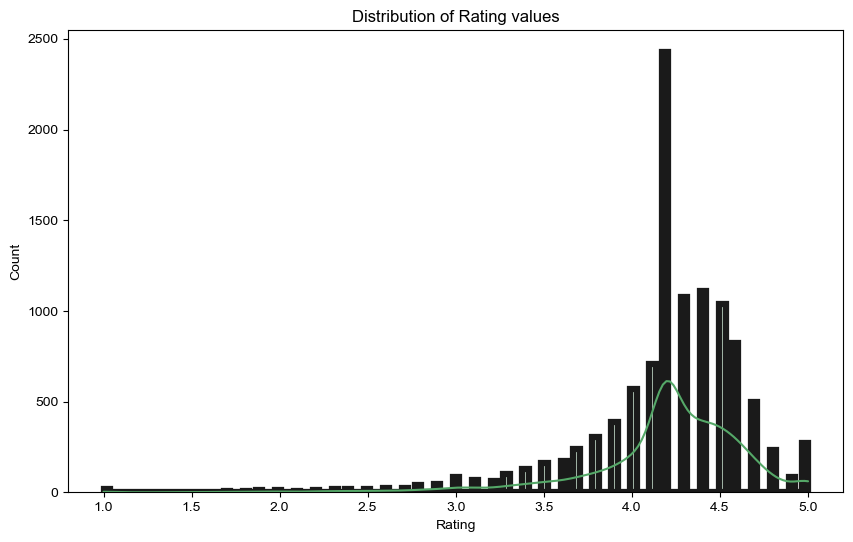

In [18]:
#size of the plot
plt.figure(figsize = (10, 6))

#Title of the graph
plt.title('Distribution of Rating values')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(df["Rating"], kde = True, color = "g", alpha = 0.3, linewidth = 4.5, edgecolor = "k")

#display the graph
plt.show();

In [19]:
#peak rating
pd.DataFrame(df['Rating'].value_counts().sort_values(ascending = False).head(1))

,Rating
4.19,1474


- Significantly right skewed distribution.
- Concentration of values between 4.0 - 4.5 with a peak at approximately 4.2.

#### BOXPLOT OF RATINGS

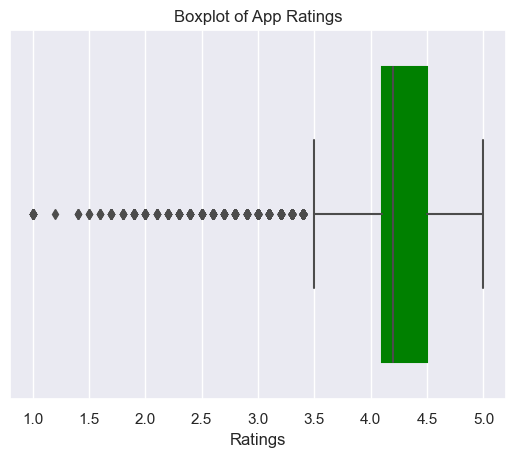

In [20]:
#create the boxplot
sns.boxplot(data = df, x = df['Rating'], boxprops = {'color': 'green'})

#label of the y-axis
plt.xlabel('Ratings') 

#title of the graph
plt.title('Boxplot of App Ratings') 

#display the graph
plt.show; 

- Median value is approximately 4.2.
- Outliers indicating relatively low values.

#### VIOLIN PLOT OF RATING

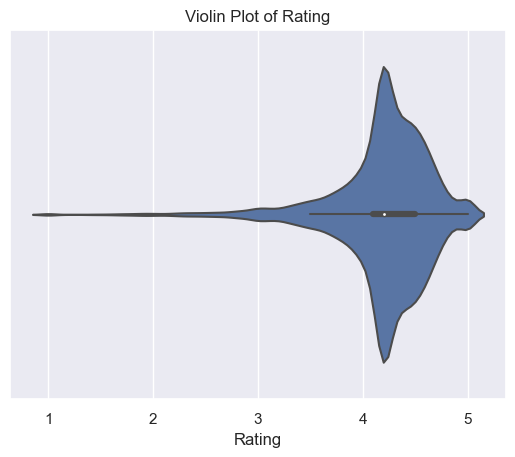

In [21]:
#title of the graph
plt.title('Violin Plot of Rating')

#create the violin plot
sns.violinplot( x = df['Rating'], data=df);

- Wide section of plot indicates concentration of values in that area.
- Long tail indicates wide range of outliers.

#### Percentage of Dominant Range

In [22]:
#filter rows using dominant range
rating_val = df[(df['Rating'] >= 4) & (df['Rating'] <= 5)]

#display statement
print('\033[1m', round((rating_val.shape[0]/df.shape[0] * 100), 1), '\033[0m', '% of the dataset falls within the dominant range.')

 81.6  % of the dataset falls within the dominant range.


#### Products that have been atleast 4.5 rating, a billion installs and very high reviews

In [23]:
#filter that rows with atleast 4.5 rating and a billion installations
good_perf = df[(df['Rating'] >=4.5) & (df['Installs'] == 1000000000)].sort_values(by = 'Reviews', ascending = False)

#names of the products in the resulting table
good_prod = good_perf['App'].unique()

#display statement
print('Products in this category are:','\033[1m', good_prod[0], ',', good_prod[1], 'and', good_prod[2], '.\033[0m')

Products in this category are:  Instagram , Subway Surfers and Google Photos .


#### Products that have a perfect rating

In [24]:
#divide number of rows with perfect rating by total number of rows and multiply by 100
perf_rating = round((df[df['Rating'] == 5].shape[0]) / (df.shape[0]), 3) * 100

#display statement
print('There are','\033[1m',df[df['Rating'] == 5].shape[0],'\033[0m','products with perfect rating.')

#display statement
print('Products that have a perfect rating occupy','\033[1m',perf_rating,'\033[0m','% of this category.')

There are  274  products with perfect rating.
Products that have a perfect rating occupy  2.5  % of this category.


#### Some products with perfect rating

In [25]:
#filter three products with perfect rating
df[df['Rating'] == 5].head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.00,15.00,37.00,1000.00,0.00,Everyone
612,American Girls Mobile Numbers,DATING,5.00,5.00,4.40,1000.00,0.00,Mature 17+
615,Awake Dating,DATING,5.00,2.00,70.00,100.00,0.00,Mature 17+


- Perfect rating but relatively low installs.

#### Products with perfect rating and above mean installs

In [26]:
df[(df['Rating'] == 5) & df['Installs'] >= df['Installs'].mean()]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating


- There are **NO** apps with perfect rating and above mean number of installations.

### REVIEWS

In [ ]:
#size of the plot
plt.figure(figsize = (10,6))

#title of the graph
plt.title('Distribution of Reviews values')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(df["Reviews"],kde = True, color = "g", alpha = 0.1, linewidth = 4.5, edgecolor = "k")

#display the graph
plt.show();

- Significantly right skewed distribution.
- Presence of outliers could be inferred from thin line along the x-axis.

#### KDE PLOT OF REVIEWS

In [ ]:
#title of the plot
plt.title('Kde Plot of Reviews')

#create the kdeplot
sns.kdeplot(df['Reviews'], fill = True, bw_method = 0.5, color = "olive") 

#display the graph
plt.show();

- The extension at the boundary is not important for the visualisation so will be corrected using either truncation or reflection.

#### REVIEWS (TRUNCATION)

In [ ]:
#title of plot
plt.title('Kde Plot of Reviews')

#set the cut parameter to implement truncation of values below zero
sns.kdeplot(df['Reviews'], fill = True, bw_method = 0.5, color = "olive", cut = 0) 

#display graph
plt.show()

#### REVIEWS (REFLECTION)

In [ ]:
#library for implementing kde to series
from scipy.stats import gaussian_kde

#Filter reviews column from dataframe
df_rev = df['Reviews']

# Compute KDE estimation using scipy.stats
k = gaussian_kde(df_rev)

# Get the estimated density values
x = np.linspace(df_rev.min(), df_rev.max(), len(df_rev))
y = k.evaluate(x)

# Reflect the negative part of the density
y_reflected = np.abs(np.concatenate((y[::-1], y)))
x_reflected = np.concatenate((-x[::-1], x))

# Create a plot with the reflected density
plt.plot(x_reflected, y_reflected)

# Add labels and title
plt.xlabel("Reviews")
plt.ylabel("Density")
plt.title("Reflected KDE Plot")

# Display the plot
plt.show();

- The truncated plot is better for the purpose of this analysis so will be chosen for visualisation.

#### BOXPLOT OF REVIEWS

In [ ]:
#create the boxplot
sns.boxplot(data = df, x = df['Reviews'])

#label of the y-axis
plt.xlabel('Reviews')

#title of the graph
plt.title('Boxplot of App Reviews')

#display of the graph
plt.show();

- Significant concentration of outliers indicating large volume of products with very high number of reviews.

#### VIOLIN PLOT OF REVIEWS

In [ ]:
#violin plot of the reviews
plt.title('Violin Plot Distribution')

#create violin plot
sns.violinplot( x = df['Reviews'], data = df)

#display graph
plt.show();

- Wide section emphasizes concentration of values at that area.
- Slight extension behind lower limit due to smoothing process. Rectified by Truncation or Reflection.

#### Some Products with Low Reviews

In [ ]:
df.sort_values('Reviews', ascending = True).head(3).iloc[:, [0, 3]]

#### Top Five Products with Most Reviews

In [ ]:
#sort the reviews column in descending order and filter the top 10 rows of the App and Reviews columns
top_rev = df[df['Reviews'] >= df['Reviews'].mean()].sort_values(by = 'Reviews', ascending = False)

#filter the unique values from the top_rev dataframe and return the first 10 values
top_rev_prod = top_rev['App'].unique()[:6]

#display statement
print("Products with the most reviews are:")
for product in (top_rev_prod[:5]):
    print(f'\t\u2022 \033[1m{product}\033[0m')

#### Percentage of Products with Above Average Number of Reviews

In [ ]:
perc_rev = round((df[df['Reviews'] >= df['Reviews'].mean()].shape[0] / df.shape[0]) * 100, 1)

#display statement
print('\033[1m',perc_rev,'\033[0m','% of products have above average reviews.')

#### Products with high number of reviews and above average rating

In [ ]:
#filter rows based on specified condition
df[(df['Reviews'] >= df['Reviews'].max()) & (df['Rating'] >= df['Rating'].mean())]

- No products with at least maximum number of reviews and above mean rating.

#### Products with above average number of reviews and high rating

In [ ]:
#filter rows based on specified conditions
df[(df['Reviews'] >= df['Reviews'].mean()) & (df['Rating'] >= df['Rating'].max())]

- No products with at least mean number of reviews and perfect rating.

#### Top Products with Above Average Number of Reviews and Above Average Rating

In [ ]:
#filter rows based on condition and sort by reviews; arrange in descending order
rev_rat = df[(df['Reviews'] >= df['Reviews'].mean()) & (df['Rating'] >= df['Rating'].mean())].sort_values(by = 'Reviews',ascending = False)

#names of the products
best_rev_rat = rev_rat['App'].unique()[:6]

#display statement
print("Products with the above mean reviews and rating are:")
for val in (best_rev_rat[:5]):
    print(f'\t\u2022 \033[1m{val}\033[0m')

#### Bar Graph of Top Six Products by Reviews and Ratings

In [ ]:
#top six products with great rating and reviews
top_rev_rat = rev_rat.iloc[: , [0,3]].groupby('App').mean().sort_values(by = 'Reviews', ascending = False).head(6)

#size of plot
plt.figure(figsize=(10, 6))

#create bar graph
sns.barplot(y = top_rev_rat.index, x = 'Reviews', data = top_rev_rat)

#x-axis title
plt.xlabel('App')

#y-axis title
plt.ylabel('Average Reviews')

#title of plot
plt.title('Top 6 Apps by Average Reviews')

#Displaying the plot
plt.show()

### SIZE

In [ ]:
#create histogram
sns.histplot(df["Size"], kde=True, color = "g", alpha = 0.25, linewidth = 4.5, edgecolor = "k")

#title of the plot
plt.title('Histogram of Size')

#title of x-axis
plt.xlabel('Size of product in KB')

#display graph
plt.show()

- The distribution shows a right skewed data. Most products fall in the range of 'Varies with device' and 100 KB
- Hint of presence of outliers as seen in line along the x-axis.

#### Frequency of app sizes

In [ ]:
#frequency of product sizes and arrange in descending order; display top five
pd.DataFrame(df['Size'].value_counts().sort_values(ascending = False).head())

- Zero here represents the category *'Varies with device'* and NOT an actual value. It was converted to a numeric value in the data cleaning to enhance the analysis.

#### KDE PLOT OF SIZE

In [ ]:
#title of plot
plt.title('Kde Plot of Size')

#set the cut parameter to implement truncation of values below zero
sns.kdeplot(df['Size'], fill = True, bw_method = 0.5, color = "olive", cut = 0) 

#display graph
plt.show();

- Concentration of values between 'Varies with Device' and 200 Kb.

#### BOXPLOT OF SIZE

In [ ]:
#create the boxplot
sns.boxplot(data = df, x = df['Size']) 

#label of the y-axis
plt.xlabel('Size in Kb') 

#title of the graph
plt.title('Boxplot of App Sizes') 

#display the graph
plt.show; 

- Significant presence of outliers.
- Products as large as 1000 Kb present in dataset.

#### Large Products

In [ ]:
#sort size column in descending order and filter app and size column
df.sort_values('Size', ascending = False).head().iloc[:, [0, 4]]

#### Large Products with High Installations

In [ ]:
#filter rows for products larger than the maximum size with at least maximum installations
df[(df['Size'] > df['Size'].max()) & (df['Installs'] >= df['Installs'].max())]

- **NO** large products with record installations.

#### Large Paywalled Products

In [ ]:
#filter rows with at least maximum size and greater than zero dollars
df[(df['Size'] >= df['Size'].max()) & (df['Price'] > 0)]

- **Word Search Tab 1 FR** is the only large app which is paid.